# What is Voting

## Introduction

### Voting is a technique that combines the predictions of multiple machine learning models to make a final decision. Instead of relying on a single model, voting uses a group of models (often called voters) and makes a prediction based on their collective outputs. This approach helps improve accuracy and reduce the risk of one model making a poor prediction.

## How Voting Works

### Voting works by training multiple classifiers on the same dataset and then combining their predictions. There are two main types of voting methods:

*   Hard Voting: Each model votes for a class label, and the label with the
majority of votes becomes the final prediction. This is like a democratic election where the most common choice wins

*   Soft Voting: Instead of voting for labels directly, models give probabilities for each class. The final prediction is made by averaging these probabilities and selecting the class with the highest average. Soft voting tends to perform better when models are well-calibrated


### Voting is useful when:

*   You have multiple models perform well on their own but make slightly different errors

*   You want to improve generalization and reduce overfitting

*   You want a simple yet effective way to boost model performance

## Advantages and Limitations

### Advantages

*   Easy to implement
*   Often leads to better performance than individual models
*   Flexible — combine different types of classifiers (e.g., logistic regression, decision trees, SVMs)

### Limitations

*   All models must be trained separately, which can be time-consuming
*   It doesn’t always guarantee improvement — especially if the individual models are weak or too similar
*   Soft voting requires that classifiers are able to predict probabilities


# Voting in Action

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf1 = DecisionTreeClassifier(random_state = 42, max_depth = 4, class_weight = {0: 1, 1: 2})
clf2 = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = {0: 1, 1: 2})
clf3 = LogisticRegression(max_iter = 1000, class_weight = {0: 1, 1: 2})

voting_clf = VotingClassifier(estimators = [
    ('decision_tree', clf1),
    ('random_forest', clf2),
    ('log_reg', clf3)
], voting = 'hard')

voting_clf.fit(X_train_balanced, y_train_balanced)

y_pred = voting_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9524
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18297
           1       0.71      0.75      0.73      1703

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



# Visualizing Results

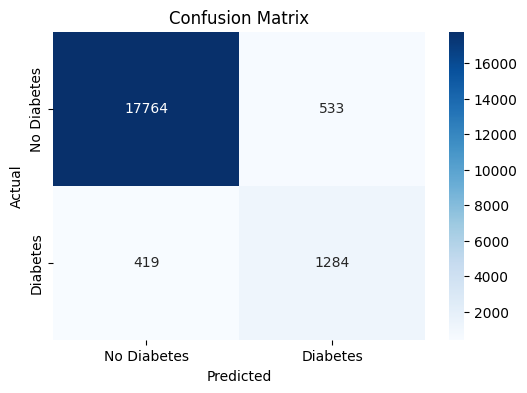

In [2]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No Diabetes', 'Diabetes'],
            yticklabels = ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### This shows how well the model predicted who has diabetes and who doesn't.

*   True Positives - 1284 people with diabetes were correctly predicted to have it.
*   True Negatives - 17764 people without diabetes were correctly predicted to not have it.
*   False Positives - 533 people without diabetes were wrongly predicted to have it.
*   False Negatives - 419 people with diabetes were wrongly predicted to not have it.

### The model is really good at identifying people without diabetes (97.09% accuracy), but it's a bit less accurate at finding those with diabetes (75.40% accuracy).